## 1. Importación de paquetes y dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import metrics

In [2]:
df = pd.read_csv("../data/credit-train.csv")

Descargar desde S3. Está comentado por si hay algún problema al acabarse las 4h de aws de la consola.

In [3]:
# df = pd.read_csv("s3://final-project-jorgens/credit-train.csv")
# print(df)

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


## 2.EDA y Visual EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

Mostramos las columnas, cuántos valores tienen y el tipo de dicha columna.

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [7]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


### NaN Data

Comprobamos si existen valores nulos y mostramos las columnas que contienen estos valores


In [8]:
nan_columns = np.any(pd.isna(df), axis = 0)
nan_columns = list(nan_columns[nan_columns == True].index)

In [9]:
nan_columns

[]

No hay valores nulos en todo el dataset

## 3. Preprocessing data

#### Numeric Data

Vamos a hacer un poco de investigación en las columnas numéricas

In [10]:
numeric_colmuns = []
numeric_colmuns.extend(list(df.dtypes[df.dtypes == np.int64].index))
numeric_colmuns.extend(list(df.dtypes[df.dtypes == np.float64].index))

In [11]:
numeric_colmuns.remove('y')
numeric_colmuns

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed']

### Box Plot

Mostramos los valores de las columnas para ver si hay valores que se van mucho de la media

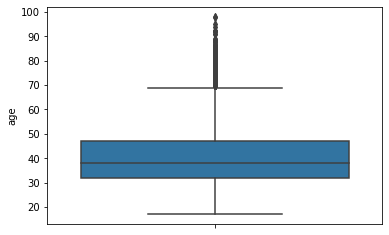

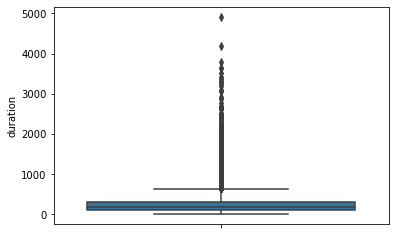

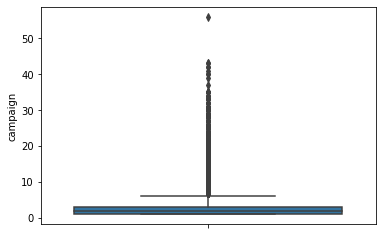

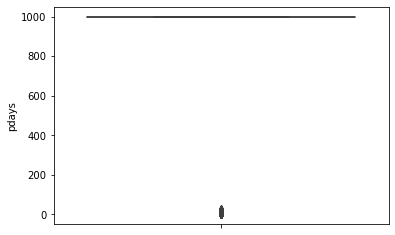

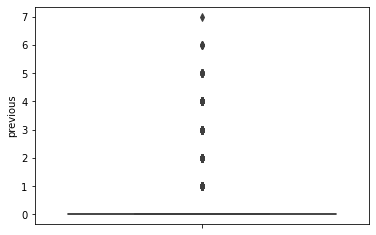

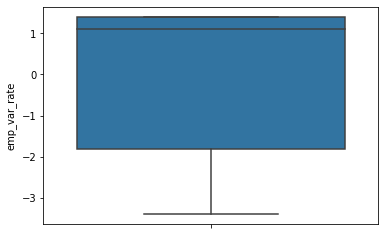

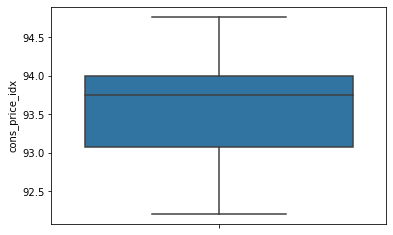

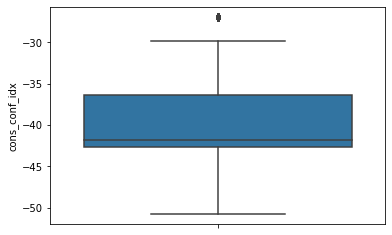

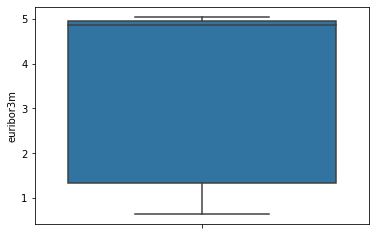

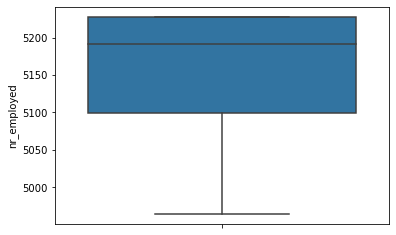

In [12]:
for var in numeric_colmuns:
    sns.boxplot(y=var,data=df)
    plt.show()

Como podemos ver, existen columnas que tienen valores que se van mucho de la media de valores de la misma. En estos casos se haría un escalado de estos valores para que no exista tanta diferencia entre los valores y esté mejor ajustado el dataset en cuanto a las columnas numéricas.

En este caso se va a dejar indicado el código para hacer este escalado ya que no se va a usar, por qué? Pues porque al aplicar el escalado, en este caso, el modelo pierde bastante score y vamos a dejar un modelo con el mejor score posible, aunque se vaya a indicar el código que se tendría que hacer para el estandarizado.

In [13]:
# means, maxs, mins = dict(), dict(), dict()

In [14]:
# numeric_data = df[numeric_colmuns]
# for col in numeric_data:
#     means[col] = numeric_data[col].mean()
#     maxs[col] = numeric_data[col].max()
#     mins[col] = numeric_data[col].min()

In [15]:
# numeric_data = (numeric_data - numeric_data.mean()) / (numeric_data.max() - numeric_data.min())

In [16]:
# numeric_data_normalized = pd.DataFrame(numeric_data)

In [17]:
# numeric_data_normalized

In [18]:
# df.drop(columns=numeric_data.columns,axis=1,inplace=True)
# df = pd.concat([df,numeric_data_normalized],axis=1)
# df

### Convert yes/no to 1/0

A continuación se va combertir columnas categóricas que contienen valores Yes/no a 1/0, esta conversión es simple y no las hacemos dummy porque no tendría sentido hacer columnas de más para el mismo resultado.

Vamos a tomar el unknow como 0.

In [19]:
columns_to_change = ['default','housing','loan']
for col in columns_to_change:
    df[col] = df[col].map(dict(yes=1, no=0, unknown=3))
    
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,3,1,0,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,0,0,0,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,0,1,0,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,0,0,0,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,0,1,0,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,3,0,1,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,3,0,0,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,3,1,1,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,0,0,1,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


### Non-numeric columns to the dummy variables

Para las demás columnas vamos a utilizar la función `get_dummies` para convertir las columnas a numéricas. Esto va a generar muchas columnas, ya que por cada valor que pueda tener la columna va a crear otra nueva de 1/0 según tenga ese valor o no.

In [20]:
non_numeric = df.select_dtypes(include=['object'])
non_numeric.head()

,job,marital,education,contact,month,day_of_week,poutcome
0,blue-collar,married,basic.4y,cellular,aug,thu,nonexistent
1,technician,married,unknown,cellular,nov,fri,nonexistent
2,management,single,university.degree,cellular,jun,thu,success
3,services,married,high.school,cellular,apr,fri,nonexistent
4,retired,married,basic.4y,cellular,aug,fri,success


In [21]:
dummies = pd.get_dummies(non_numeric)
dummies.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [22]:
dummies.shape

(41188, 44)

### Add the dummy to the dataframe

Una vez tenemos las columnas pasadas a numéricas, las añadimos al dataframe original y eliminamos las categóricas

In [23]:
df = pd.concat([df,dummies],axis=1)
df.drop(columns=non_numeric.columns,axis=1,inplace=True)

In [24]:
df.head()

,age,default,housing,loan,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,3,1,0,210,1,999,0,1.4,93.444,...,0,0,0,0,1,0,0,0,1,0
1,53,0,0,0,138,1,999,0,-0.1,93.200,...,0,0,1,0,0,0,0,0,1,0
2,28,0,1,0,339,3,6,2,-1.7,94.055,...,0,0,0,0,1,0,0,0,0,1
3,39,0,0,0,185,2,999,0,-1.8,93.075,...,0,0,1,0,0,0,0,0,1,0
4,55,0,1,0,137,1,3,1,-2.9,92.201,...,0,0,1,0,0,0,0,0,0,1


In [25]:
df.columns

Index(['age', 'default', 'housing', 'loan', 'duration', 'campaign', 'pdays',
       'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
       'euribor3m', 'nr_employed', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of

Como vemos, ahora tenemos muchas más columnas.

### We look at the correlation of all columns

Vamos a mostrar lña correlación de todas las columnas entre sí para decidir cuales coger.

Aquí veo 2 posibilidades que se suelen hacer, una es eliminar las columnas que tienen una correlación muy pobre. Y otra es dejar todas las columnas porque cuantas más features, mayor será el score del modelo. En este caso vamos a dejar todas las columnas, esto aunque parezca extraño, se utiliza bastante para maximizar el score del modelo.

<AxesSubplot:>

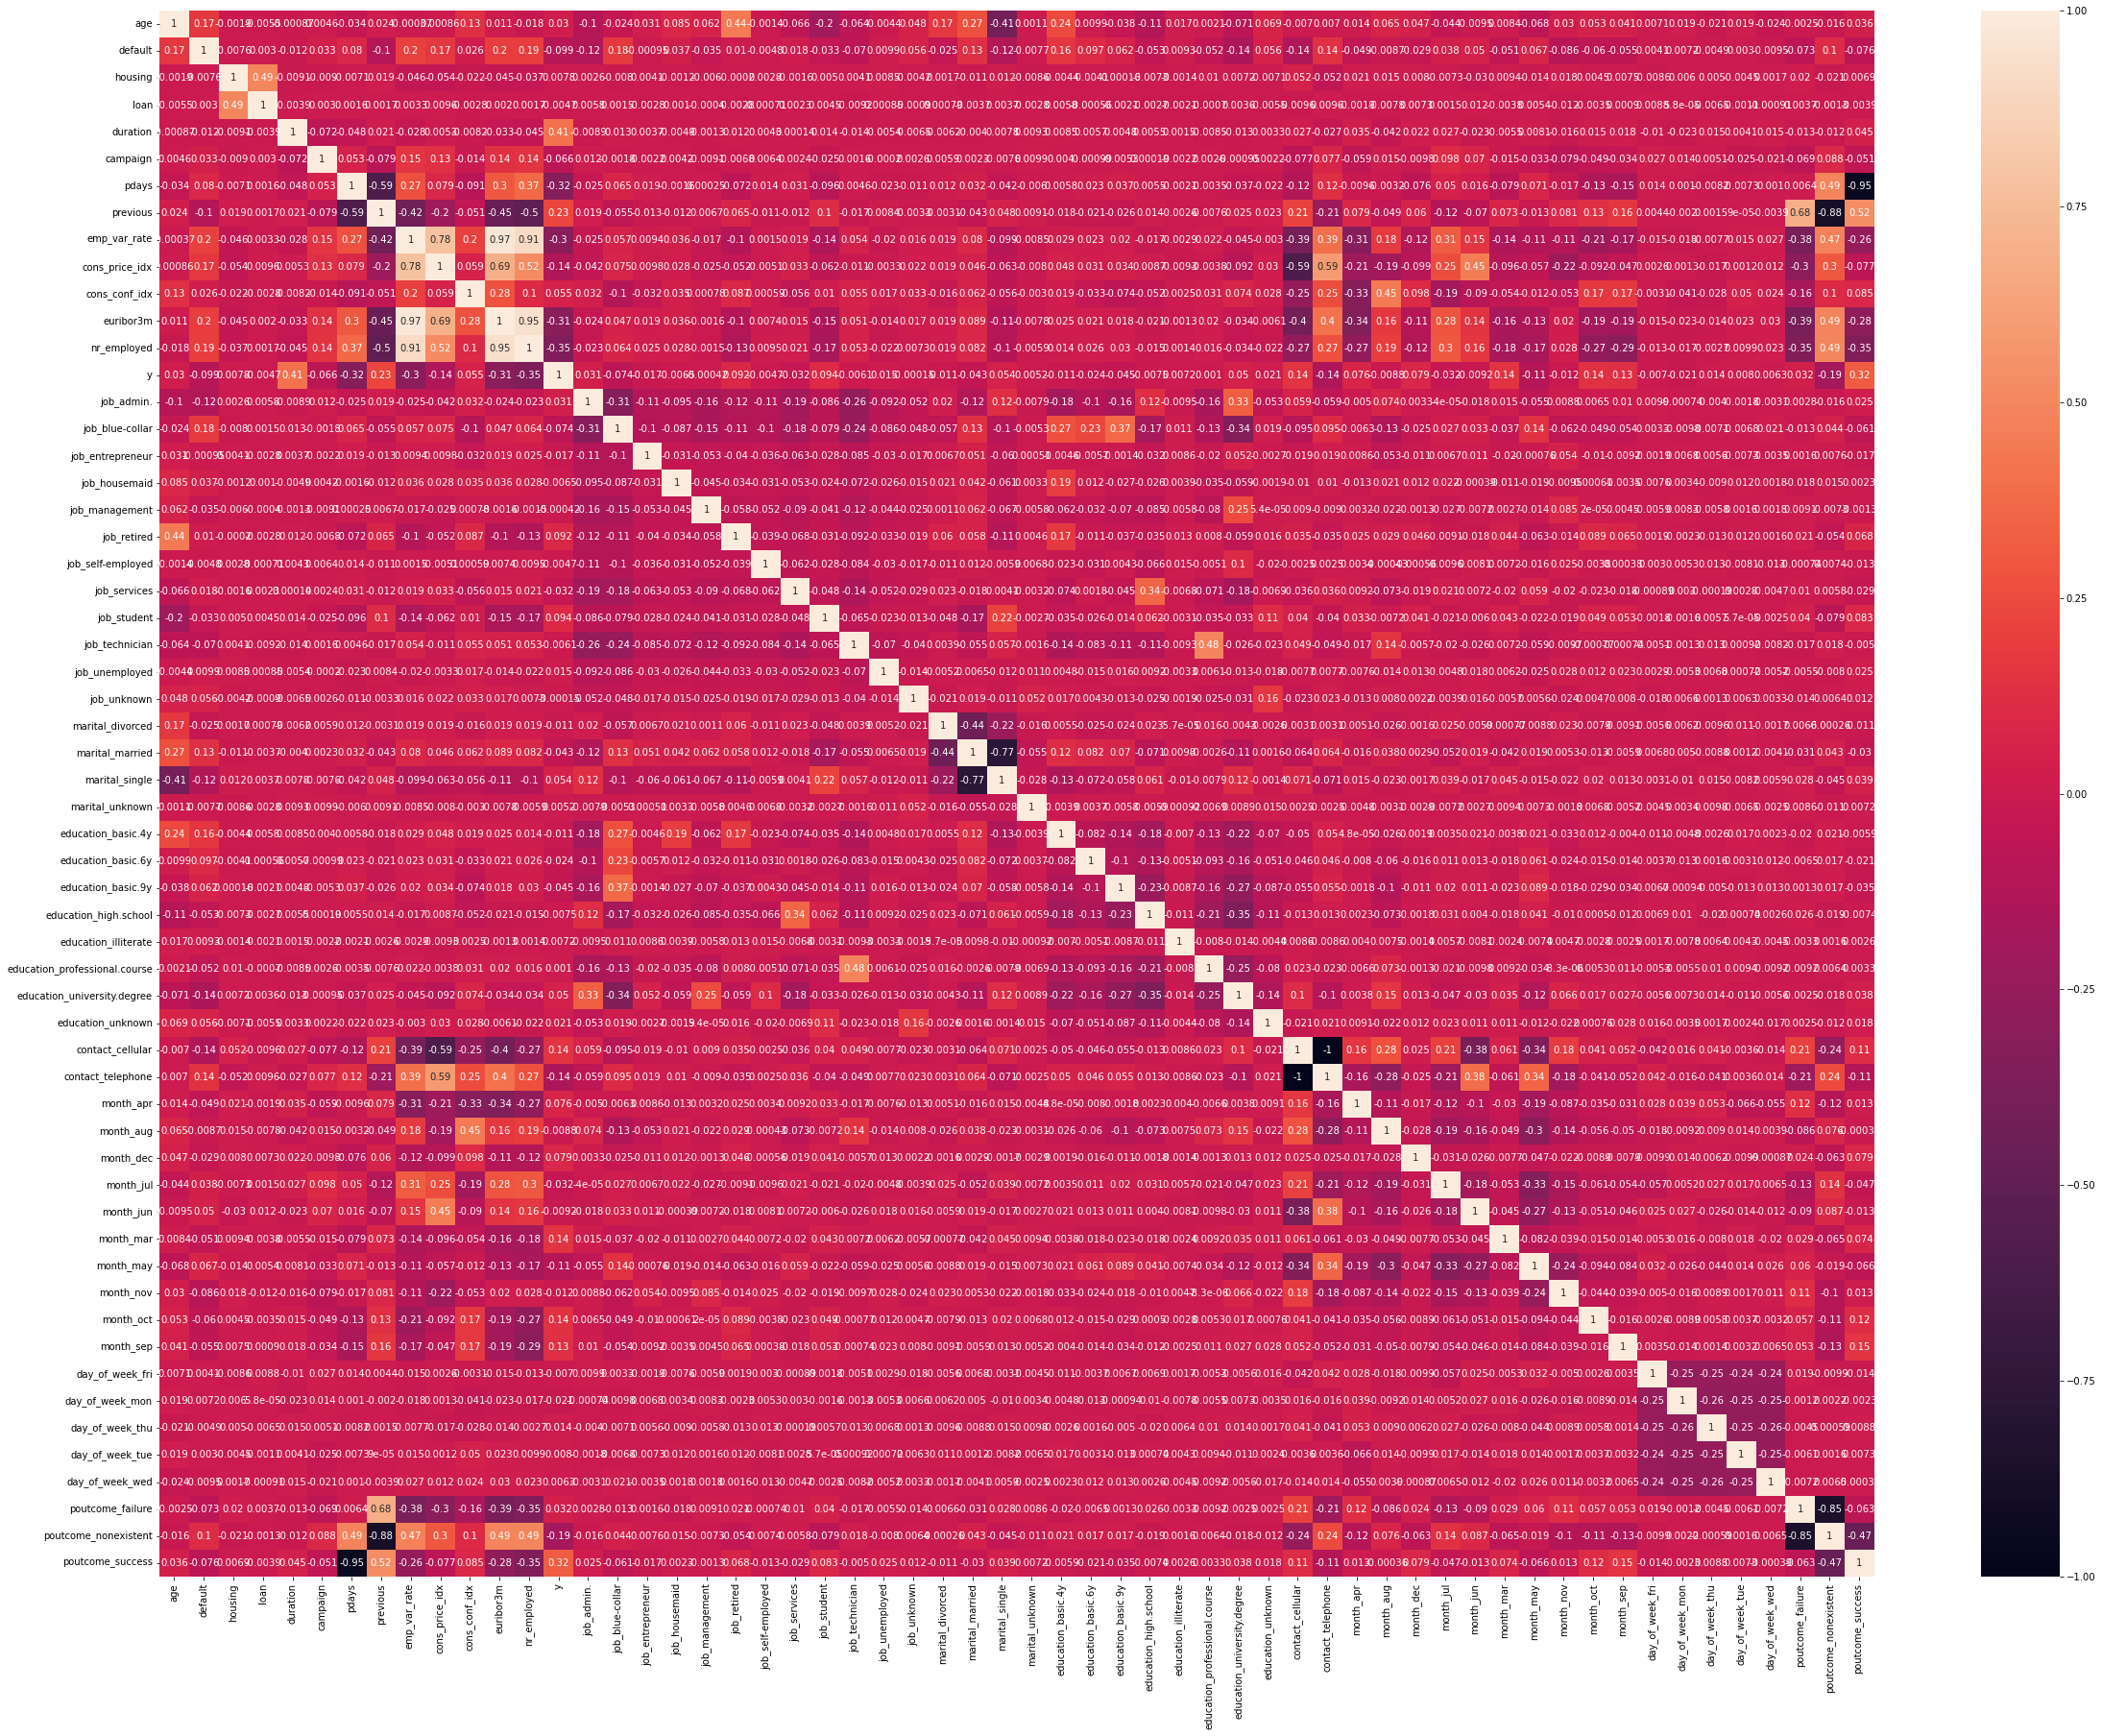

In [26]:
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(),annot=True)

## 4. Creación del modelo y división del dataset

Cogemos todas las columnas para la `X`, menos la y, que es lo que queremos calcular, que la añadimos a la `y` como única feature.

In [27]:
X = df.drop("y", axis = 1)
y = df[["y"]]

In [28]:
X.shape

(41188, 57)

In [29]:
y.shape

(41188, 1)

Hacemos el split de los datos, donde dejamos el 80% de los datos para entrenamiento y un 20% para el test

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Aquí se deja comentado el código para realizar la estandarización de los datos, que como ya hemos dicho, en nuestro caso no lo vamos a hacer para que el modelo no pierda score.

In [31]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()

# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [32]:
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (32950, 57)
Test feature set size: (8238, 57)
Training variable set size: (32950, 1)
Test variable set size: (8238, 1)


Vamos a calcular el mejor valor de K para el modelo. Lo vamos a hacer con un rango de 30.

/home/jorge/anaconda3/envs/final-project-ud2/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/jorge/anaconda3/envs/final-project-ud2/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/jorge/anaconda3/envs/final-project-ud2/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/jorge/anaconda3/envs/final-project-ud2/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: 

([<matplotlib.axis.XTick at 0x7fc9f09a76a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

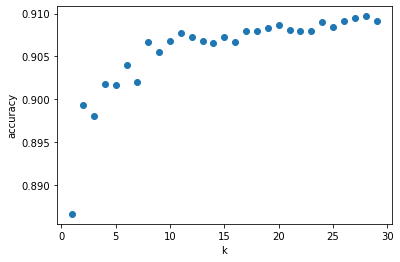

In [33]:
k_range = range(1, 30)
scores = []
for k in k_range:
      knn = KNeighborsClassifier(n_neighbors = k)
      knn.fit(X_train, y_train)
      scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20,25,30])

Como vemos, el mejor valor de K en este rango es 28. Podría seguir subiendo, pero es suficiente para nuestro caso, sino va a tardar demasiado en hacer las predicciones y va a ocupar demasiado espacio de memoria.

In [34]:
n_neighbors = 28
model = KNeighborsClassifier(n_neighbors, weights="distance")

## 5. Entrenamiento

In [35]:
model.fit(X_train, y_train)

/home/jorge/anaconda3/envs/final-project-ud2/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=28, weights='distance')

## 6. Análisis de resultados

In [36]:
score = model.score(X_test,y_test)
score

0.9092012624423403

El score del modelo no está mal, pero tampoco es un score demasiado bueno.

In [37]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(model.score(X_train, y_train)))

Accuracy of K-NN classifier on training set: 1.00


In [38]:
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(model.score(X_test, y_test)))

Accuracy of K-NN classifier on test set: 0.91


La exactitud de l modelo en el test es de 91%

## 7. Realización de predicciones

Realizamos las predicciones sobre el test.

In [39]:
pred = model.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 1])

Mostramos la matriz de confusión para ver los resultados.

In [40]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7295
           1       0.64      0.49      0.55       943

    accuracy                           0.91      8238
   macro avg       0.79      0.72      0.75      8238
weighted avg       0.90      0.91      0.90      8238



In [41]:
cm = metrics.confusion_matrix(y_test, model.predict(X_test))

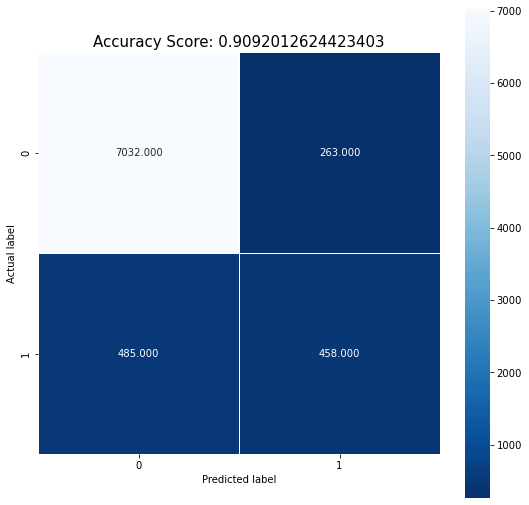

In [42]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

La información que podemos obtener de la matriz de confusión es que la precisión para los TN es bastante elevada, del 94%, pero para los TP es bastante baja, del 67%...

Esto es que clasifica como negativos 485 registros que deberían haber sido positivos, y 263 registros como positivos que deberían haber sido negativos.

COmo vemos, en cuanto a clasificar los positivos, es bastante pobre.


La exhaustividad del modelo es algo como la precisión. En negativos es alta, pero en positivos es muuuy baja.

En cuando al F1, como es un valor a partir de los dos anteriores, vamos a tener un poco de lo mismo.

El resumen es que clasifica bien los negativos, pero mal los positivos.

## 8. Visualización

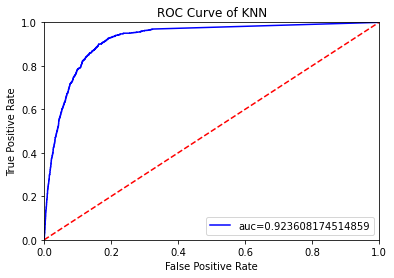

In [43]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,'b',label="auc="+str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('ROC Curve of KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

Esta curva relaciona el recall con el ratio de FP, es decir, la sensibilidad del modelo con los fallos optimistas. Esto es que al aumentar el recall, el modelo tenderá a ser más optimista y tendrá más falsos positivos al clasificar

CDomo vemos aquí tenemos una precisión de 0.92 con los TP y FP